# 爬取留学数据整理分析

### 0.对两份数据中对应的id进行合并 并加入时间序列索引以便划定时间范围

入学时间：2018-2020
若将获取的url数 即发帖人数暂定为申请人数
总获取申请结果数量为总申请数

澳大利亚\新加坡\英国\香港\美国
分别为：420\910\1715\4646\4165申请数

In [1]:
'''
定义汇总函数，分别读取对应地区的info信息和offer信息，并应用merge函数，以id为参数进行连接
由于2020年度申请刚刚开始，因此选取前两年的同时间段进行比较，因此添加时间序列索引，以便筛选时间
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def esdf(info0,offer0):
    '''创建对应汇总dataframe'''
    info=pd.DataFrame(pd.read_excel('{}.xlsx'.format(info0))).replace(' ',np.nan)
    offer=pd.DataFrame(pd.read_excel('{}.xlsx'.format(offer0))).replace(' ',np.nan)
    df=pd.merge(info,offer,on='id')
    
    tag=['id','TOEFL','IELTS','GRE','GMAT','本科学校档次','本科专业','本科GPA及排名',
             '研究生学校档次','研究生专业','研究生GPA及排名','其他说明',
             'OFFER标签数','申请学校','申请学位','申请专业','申请结果',
             '入学年度','入学时间','通知时间']
    #OFFER标签数-1即为收到的第几封offer
    df.columns=tag
    time=df['通知时间'].tolist()
    index=pd.DatetimeIndex(time)
    df=df.set_index(index)
    return df

df1=esdf('个人信息汇总/Ausinfo汇总','offer汇总/Ausoffer汇总')#澳洲
df2=esdf('个人信息汇总/Singinfo汇总','offer汇总/Singoffer汇总')#新加坡
df3=esdf('个人信息汇总/UKinfo汇总','offer汇总/UKoffer汇总')#英国
df4=esdf('个人信息汇总/HKinfo汇总','offer汇总/HKoffer汇总')#香港
df5=esdf('个人信息汇总/USAinfo汇总','offer汇总/USAoffer汇总')#美国

### 一、三年五个地区申请总量对比

#### 1.1  18\19\20届各地区的申请总数比较

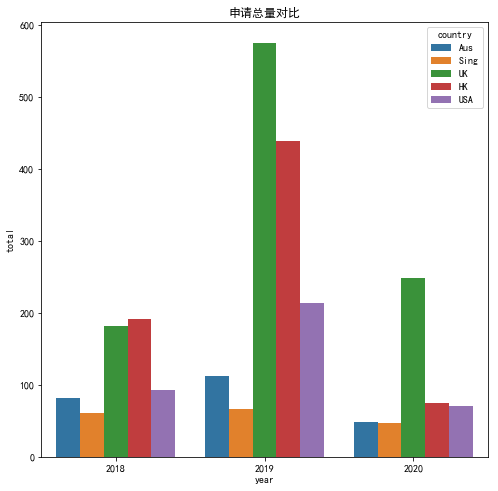

In [7]:
#2018-2020年度总申请量比较 因为2020年度申请尚未结束 故截取同期时间进行概览比较
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

name=['Aus','Sing','UK','HK','USA']

df18=df1.loc['2017-9-1':'2017-12-15']
df19=df1.loc['2018-9-1':'2018-12-15']
df10=df1.loc['2019-9-1':'2019-12-15']

df28=df2.loc['2017-9-1':'2017-12-15']
df29=df2.loc['2018-9-1':'2018-12-15']
df20=df2.loc['2019-9-1':'2019-12-15']

df38=df3.loc['2017-9-1':'2017-12-15']
df39=df3.loc['2018-9-1':'2018-12-15']
df30=df3.loc['2019-9-1':'2019-12-15']

df48=df4.loc['2017-9-1':'2017-12-15']
df49=df4.loc['2018-9-1':'2018-12-15']
df40=df4.loc['2019-9-1':'2019-12-15']

df58=df5.loc['2017-9-1':'2017-12-15']
df59=df5.loc['2018-9-1':'2018-12-15']
df50=df5.loc['2019-9-1':'2019-12-15']

#2018
list1=[df18.shape[0],df28.shape[0],df38.shape[0],df48.shape[0],df58.shape[0]]
#2019:
list2=[df19.shape[0],df29.shape[0],df39.shape[0],df49.shape[0],df59.shape[0]]
#2020:
list3=[df10.shape[0],df20.shape[0],df30.shape[0],df40.shape[0],df50.shape[0]]

zonshu=pd.DataFrame()
zonshu["year"]=[2018]*5+[2019]*5+[2020]*5
zonshu["total"]=list1+list2+list3
zonshu["country"]=name*3

plt.rcParams['figure.figsize'] = [8,8]
plt.figure()
sns.barplot(x='year',y='total',hue='country',data=zonshu)
plt.title('申请总量对比')
plt.show()

#### 1.2 通过方差分析检验对比18\19\20届申请量是否有显著性差异

选择年份作为检验变量，通过方差分析检验18、19、20三年的申请量是否有显著性差异。
方差分析的原假设为：三年的申请量是没有显著性差异的

In [8]:
import scipy.stats as ss
args = [list1,list2,list3]
ss.f_oneway(*args)

F_onewayResult(statistic=2.550866729817626, pvalue=0.11935666507790887)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值大于0.1，因此在统计意义上应该接受原假设，即三年的申请总量是没有显著性差异的

#### 1.3 通过方差分析检验对比五个地区的申请量是否有显著性差异

选择地区作为检验变量，通过方差分析检验五个地区的申请量是否有显著性差异。
方差分析的原假设为：五个地区的申请量是没有显著性差异的

In [9]:
d1 = zonshu[zonshu["country"]=="Aus"]['total']
d2 = zonshu[zonshu["country"]=="Sing"]['total']
d3 = zonshu[zonshu["country"]=="UK"]['total']
d4 = zonshu[zonshu["country"]=="HK"]['total']
d5 = zonshu[zonshu["country"]=="USA"]['total']
args = [d1,d2,d3,d4,d5]
ss.f_oneway(*args)

F_onewayResult(statistic=2.3419168193207827, pvalue=0.12543925902658948)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值大于0.1，因此在统计意义上应该接受原假设，即五个地区的申请量是没有显著性差异的

### 二、三年五个地区失败申请量与失败申请率对比

#### 2.1  18\19\20届各地区的失败申请量与失败申请率对比

In [11]:
df18o=df18[df18['申请结果'].isin(['被拒','Waitinglist'])]
df19o=df19[df19['申请结果'].isin(['被拒','Waitinglist'])]
df10o=df10[df10['申请结果'].isin(['被拒','Waitinglist'])]

df28o=df28[df28['申请结果'].isin(['被拒','Waitinglist'])]
df29o=df29[df29['申请结果'].isin(['被拒','Waitinglist'])]
df20o=df20[df20['申请结果'].isin(['被拒','Waitinglist'])]

df38o=df38[df38['申请结果'].isin(['被拒','Waitinglist'])]
df39o=df39[df39['申请结果'].isin(['被拒','Waitinglist'])]
df30o=df30[df30['申请结果'].isin(['被拒','Waitinglist'])]

df48o=df48[df48['申请结果'].isin(['被拒','Waitinglist'])]
df49o=df49[df49['申请结果'].isin(['被拒','Waitinglist'])]
df40o=df40[df40['申请结果'].isin(['被拒','Waitinglist'])]

df58o=df58[df58['申请结果'].isin(['被拒','Waitinglist'])]
df59o=df59[df59['申请结果'].isin(['被拒','Waitinglist'])]
df50o=df50[df50['申请结果'].isin(['被拒','Waitinglist'])]

#2018
list1=[df18o.shape[0],df28o.shape[0],df38o.shape[0],df48o.shape[0],df58o.shape[0]]
#2019:
list2=[df19o.shape[0],df29o.shape[0],df39o.shape[0],df49o.shape[0],df59o.shape[0]]
#2020:
list3=[df10o.shape[0],df20o.shape[0],df30o.shape[0],df40o.shape[0],df50o.shape[0]]

shibaizonshu=pd.DataFrame()
shibaizonshu["year"]=[2018]*5+[2019]*5+[2020]*5
shibaizonshu["total"]=list1+list2+list3
shibaizonshu["country"]=name*3

shibaizonshu["rate"]=shibaizonshu["total"].div(zonshu["total"])

1）18\19\20届各地区的失败申请量

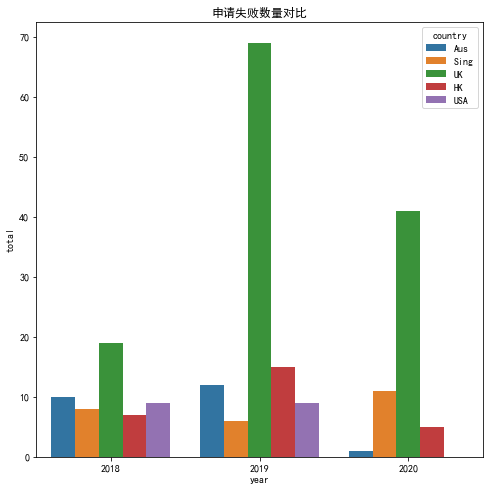

In [12]:
plt.rcParams['figure.figsize'] = [8,8]
plt.figure()
sns.barplot(x='year',y='total',hue='country',data=shibaizonshu)
plt.title('申请失败数量对比')
plt.show()

2）18\19\20届各地区的失败申请率

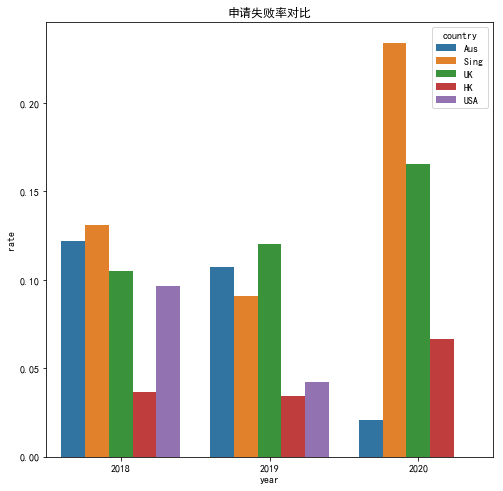

In [13]:
plt.rcParams['figure.figsize'] = [8,8]
plt.figure()
sns.barplot(x='year',y='rate',hue='country',data=shibaizonshu)
plt.title('申请失败率对比')
plt.show()

#### 2.2  通过方差分析检验对比18\19\20届的失败申请量/失败申请率是否有显著性差异

1）对于失败申请量

选择年份作为检验变量，通过方差分析检验18、19、20三年的申请量是否有显著性差异。 方差分析的原假设为：三年的申请量是没有显著性差异的

In [14]:
import scipy.stats as ss
args = [list1,list2,list3]
ss.f_oneway(*args)

F_onewayResult(statistic=0.6150029767811075, pvalue=0.556835914703187)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值大于0.1，因此在统计意义上应该接受原假设，即三年的申请量是没有显著性差异的

2）对于失败申请率

选择年份作为检验变量，通过方差分析检验18、19、20三年的申请失败率是否有显著性差异。 方差分析的原假设为：三年的申请失败率是没有显著性差异的

In [15]:
import scipy.stats as ss
d1 = shibaizonshu[shibaizonshu["year"]==2018]['rate']
d2 = shibaizonshu[shibaizonshu["year"]==2019]['rate']
d3 = shibaizonshu[shibaizonshu["year"]==2020]['rate']
args = [d1,d2,d3]
ss.f_oneway(*args)

F_onewayResult(statistic=0.1413832055980905, pvalue=0.8695815569433636)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值大于0.1，因此在统计意义上应该接受原假设，即三年的申请失败率是没有显著性差异的

#### 2.3 通过方差分析检验对比五个地区的失败申请量/失败申请率是否有显著性差异

1）对于失败申请量

选择地区作为检验变量，通过方差分析检验五个地区的申请量是否有显著性差异。 方差分析的原假设为：五个地区的申请量是没有显著性差异的

In [16]:
d1 = shibaizonshu[shibaizonshu["country"]=="Aus"]['total']
d2 = shibaizonshu[shibaizonshu["country"]=="Sing"]['total']
d3 = shibaizonshu[shibaizonshu["country"]=="UK"]['total']
d4 = shibaizonshu[shibaizonshu["country"]=="HK"]['total']
d5 = shibaizonshu[shibaizonshu["country"]=="USA"]['total']
args = [d1,d2,d3,d4,d5]
ss.f_oneway(*args)

F_onewayResult(statistic=5.176877015200367, pvalue=0.01601145608543465)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值小于0.1，因此在统计意义上应该拒绝原假设，即五个地区的申请量是有显著性差异的

2）对于失败申请率

选择地区作为检验变量，通过方差分析检验五个地区的申请失败率是否有显著性差异。 方差分析的原假设为：五个地区的申请失败率是没有显著性差异的

In [17]:
d1 = shibaizonshu[shibaizonshu["country"]=="Aus"]['rate']
d2 = shibaizonshu[shibaizonshu["country"]=="Sing"]['rate']
d3 = shibaizonshu[shibaizonshu["country"]=="UK"]['rate']
d4 = shibaizonshu[shibaizonshu["country"]=="HK"]['rate']
d5 = shibaizonshu[shibaizonshu["country"]=="USA"]['rate']
args = [d1,d2,d3,d4,d5]
ss.f_oneway(*args)

F_onewayResult(statistic=2.8983939049624183, pvalue=0.07847933934537353)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值小于0.1，因此在统计意义上应该拒绝原假设，即五个地区的申请失败率是有显著性差异的

### 三、三年五个地区申请人数对比

#### 3.1 对应被拒名单，同一id去重体现申请人数

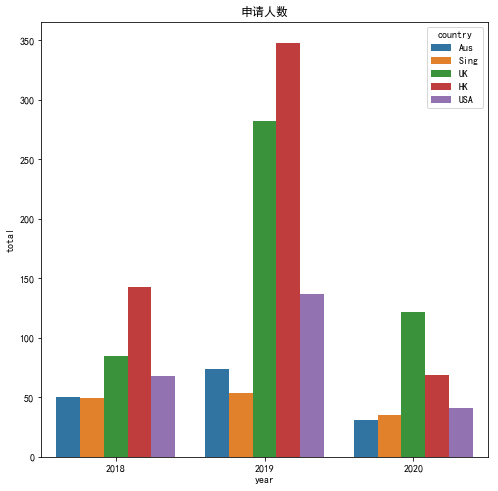

In [30]:
df181=df18.drop_duplicates(['id'],keep='first')
df191=df19.drop_duplicates(['id'],keep='first')
df101=df10.drop_duplicates(['id'],keep='first')

df281=df28.drop_duplicates(['id'],keep='first')
df291=df29.drop_duplicates(['id'],keep='first')
df201=df20.drop_duplicates(['id'],keep='first')

df381=df38.drop_duplicates(['id'],keep='first')
df391=df39.drop_duplicates(['id'],keep='first')
df301=df30.drop_duplicates(['id'],keep='first')

df481=df48.drop_duplicates(['id'],keep='first')
df491=df49.drop_duplicates(['id'],keep='first')
df401=df40.drop_duplicates(['id'],keep='first')

df581=df58.drop_duplicates(['id'],keep='first')
df591=df59.drop_duplicates(['id'],keep='first')
df501=df50.drop_duplicates(['id'],keep='first')

#2018
list1=[df181.shape[0],df281.shape[0],df381.shape[0],df481.shape[0],df581.shape[0]]
#2019:
list2=[df191.shape[0],df291.shape[0],df391.shape[0],df491.shape[0],df591.shape[0]]
#2020:
list3=[df101.shape[0],df201.shape[0],df301.shape[0],df401.shape[0],df501.shape[0]]

person=pd.DataFrame()
person["year"]=[2018]*5+[2019]*5+[2020]*5
person["total"]=list1+list2+list3
person["country"]=name*3

plt.rcParams['figure.figsize'] = [8,8]
plt.figure()
sns.barplot(x='year',y='total',hue='country',data=person)
plt.title('申请人数')
plt.show()

#### 3.2 通过方差分析检验对比18\19\20届申请人数是否有显著性差异

选择年份作为检验变量，通过方差分析检验18、19、20三年的申请人数是否有显著性差异。 方差分析的原假设为：三年的申请人数是没有显著性差异的

In [31]:
import scipy.stats as ss
args = [list1,list2,list3]
ss.f_oneway(*args)

F_onewayResult(statistic=3.1051264855816014, pvalue=0.08188259594580029)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值小于0.1，因此在统计意义上应该拒绝原假设，即三年的申请人数是有显著性差异的

#### 3.3 通过方差分析检验对比五个地区的申请人数是否有显著性差异

选择地区作为检验变量，通过方差分析检验五个地区的申请人数是否有显著性差异。 方差分析的原假设为：五个地区的申请人数是没有显著性差异的

In [32]:
d1 = person[person["country"]=="Aus"]['total']
d2 = person[person["country"]=="Sing"]['total']
d3 = person[person["country"]=="UK"]['total']
d4 = person[person["country"]=="HK"]['total']
d5 = person[person["country"]=="USA"]['total']
args = [d1,d2,d3,d4,d5]
ss.f_oneway(*args)

F_onewayResult(statistic=1.8159842060479736, pvalue=0.20239185434424392)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值大于0.1，因此在统计意义上应该接受原假设，即五个地区的申请人数是没有显著性差异的

### 四、三年五个地区失败申请人数与失败申请率对比

#### 4.1 18\19\20届各地区的失败申请人数与失败申请率占比

In [46]:
list1=[]
list2=[]
list3=[]
list1.append(pd.DataFrame(df181.groupby('申请结果').size()).iloc[3][0])
list2.append(pd.DataFrame(df191.groupby('申请结果').size()).iloc[3][0])
list3.append(0)

list1.append(pd.DataFrame(df281.groupby('申请结果').size()).iloc[3][0])
list2.append(pd.DataFrame(df291.groupby('申请结果').size()).iloc[3][0])
list3.append(pd.DataFrame(df201.groupby('申请结果').size()).iloc[3][0])

list1.append(pd.DataFrame(df381.groupby('申请结果').size()).iloc[3][0])
list2.append(pd.DataFrame(df391.groupby('申请结果').size()).iloc[3][0])
list3.append(pd.DataFrame(df301.groupby('申请结果').size()).iloc[3][0])

list1.append(pd.DataFrame(df481.groupby('申请结果').size()).iloc[3][0])
list2.append(pd.DataFrame(df491.groupby('申请结果').size()).iloc[3][0])
list3.append(pd.DataFrame(df401.groupby('申请结果').size()).iloc[3][0])

list1.append(pd.DataFrame(df581.groupby('申请结果').size()).iloc[3][0])
list2.append(pd.DataFrame(df591.groupby('申请结果').size()).iloc[3][0])
list3.append(0)


persono=pd.DataFrame()
persono["year"]=[2018]*5+[2019]*5+[2020]*5
persono["total"]=list1+list2+list3
persono["country"]=name*3
persono["rate"]=persono["total"].div(person["total"])

1）18\19\20届各地区的失败申请人数

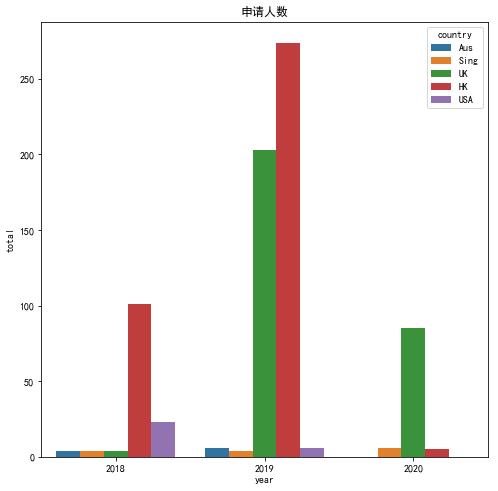

In [47]:
plt.rcParams['figure.figsize'] = [8,8]
plt.figure()
sns.barplot(x='year',y='total',hue='country',data=persono)
plt.title('申请人数')
plt.show()

2）18\19\20届各地区的失败申请率

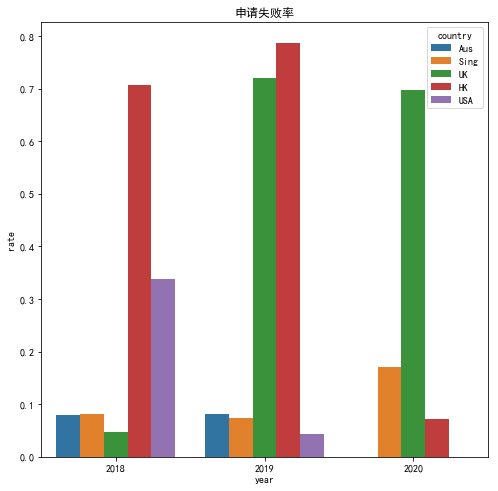

In [49]:
plt.rcParams['figure.figsize'] = [8,8]
plt.figure()
sns.barplot(x='year',y='rate',hue='country',data=persono)
plt.title('申请失败率')
plt.show()

#### 4.2 通过方差分析检验对比18\19\20届的失败申请人数/失败申请率是否有显著性差异

1）对于失败申请人数

选择年份作为检验变量，通过方差分析检验18、19、20三年的申请人数是否有显著性差异。 方差分析的原假设为：三年的申请人数是没有显著性差异的

In [50]:
import scipy.stats as ss
args = [list1,list2,list3]
ss.f_oneway(*args)

F_onewayResult(statistic=1.4282055881063416, pvalue=0.2777179890685502)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值大于0.1，因此在统计意义上应该接受原假设，即三年的申请人数是没有显著性差异的

2）对于失败申请率

选择年份作为检验变量，通过方差分析检验18、19、20三年的申请失败率是否有显著性差异。 方差分析的原假设为：三年的申请失败率是没有显著性差异的

In [51]:
import scipy.stats as ss
d1 = persono[persono["year"]==2018]['rate']
d2 = persono[persono["year"]==2019]['rate']
d3 = persono[persono["year"]==2020]['rate']
args = [d1,d2,d3]
ss.f_oneway(*args)

F_onewayResult(statistic=0.28969431329231765, pvalue=0.7535815724022181)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值大于0.1，因此在统计意义上应该接受原假设，即三年的申请失败率是没有显著性差异的

#### 4.3 通过方差分析检验对比五个地区的失败申请人数/失败申请率是否有显著性差异

1）对于失败申请人数

选择地区作为检验变量，通过方差分析检验五个地区的申请人数是否有显著性差异。 方差分析的原假设为：五个地区的申请人数是没有显著性差异的

In [60]:
d1 = persono[persono["country"]=="Aus"]['total']
d2 = persono[persono["country"]=="Sing"]['total']
d3 = persono[persono["country"]=="UK"]['total']
d4 = persono[persono["country"]=="HK"]['total']
d5 = persono[persono["country"]=="USA"]['total']
args = [d1,d2,d3,d4,d5]
ss.f_oneway(*args)

F_onewayResult(statistic=1.8212857225668073, pvalue=0.20138366501133392)

In [ ]:
由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值大于0.1，因此在统计意义上应该接受原假设，即五个地区的申请人数是没有有显著性差异的

2）对于失败申请率

选择地区作为检验变量，通过方差分析检验五个地区的申请失败率是否有显著性差异。 方差分析的原假设为：五个地区的申请失败率是没有显著性差异的

In [61]:
d1 = persono[persono["country"]=="Aus"]['rate']
d2 = persono[persono["country"]=="Sing"]['rate']
d3 = persono[persono["country"]=="UK"]['rate']
d4 = persono[persono["country"]=="HK"]['rate']
d5 = persono[persono["country"]=="USA"]['rate']
args = [d1,d2,d3,d4,d5]
ss.f_oneway(*args)

F_onewayResult(statistic=2.2579594504380696, pvalue=0.13507965914601636)

由上述检验结果可以得出，在显著性水平为0.1的条件下，检验的P值大于0.1，因此在统计意义上应该接受原假设，即五个地区的申请失败率是没有显著性差异的

### 五、五个地区同期申请失败率对比

<Figure size 1440x720 with 0 Axes>

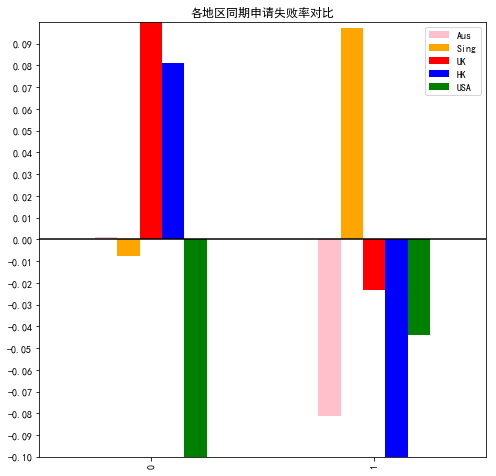

In [62]:
d1 = persono[persono["year"]==2018]['rate'].values
d2 = persono[persono["year"]==2019]['rate'].values
d3 = persono[persono["year"]==2020]['rate'].values
rise1=pd.DataFrame(d2-d1).T
rise2=pd.DataFrame(d3-d2).T
rise=pd.concat([rise1,rise2]).reset_index(drop=True)
rise.columns=name

x = np.linspace(-1, 2, 50)
y=0*x
plt.figure(figsize=(20,10))
colors = ['pink','orange','r','b','g']
rise.plot(kind='bar',color=colors)

plt.plot(x,y,color='black')
my_y_ticks = np.arange(-0.1,0.1,0.01)
plt.yticks(my_y_ticks)
plt.ylim((-0.1, 0.1))

plt.title('各地区同期申请失败率对比')
plt.show()

### 六、选取国家具体分析

#### 6.1.英国PSW签证落地

2019.9.10放出消息，2019.10.10正式落地


分为不同年份同期9.10-10.10以及10.10-12.15两部分进行分段研究

6.1.1.申请量比较

In [68]:
uk181=df38.loc['2017-9-10':'2017-10-10']
uk191=df39.loc['2018-9-10':'2018-10-10']
uk101=df30.loc['2019-9-10':'2019-10-10']

uk281=df38.loc['2017-10-11':'2017-12-15']
uk291=df39.loc['2018-10-11':'2018-12-15']
uk201=df30.loc['2019-10-11':'2019-12-15']

list1=[[uk181.shape[0],uk281.shape[0]],[uk191.shape[0],uk291.shape[0]],[uk101.shape[0],uk201.shape[0]]]
uk1=pd.DataFrame(data={'2018':list1[0],'2019':list1[1],'2020':list1[2]},index=['9.10-10.10','10.11-12.15'])

In [69]:
uk1

,2018,2019,2020
9.10-10.10,8,34,22
10.11-12.15,173,541,226


In [70]:
total1=pd.DataFrame(data={'2018':181,'2019':575,'2020':251},index=['9.10-10.10','10.11-12.15'])
sumuk=uk1.div(total1)
sumuk

,2018,2019,2020
9.10-10.10,0.044199,0.05913,0.087649
10.11-12.15,0.955801,0.94087,0.900398


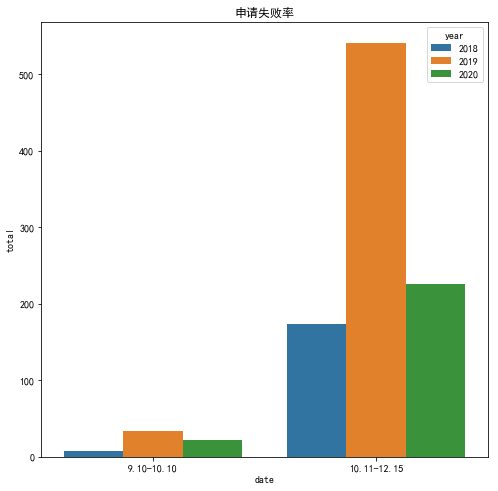

In [74]:
shenqingliang=pd.DataFrame()
shenqingliang["year"]=[2018]*2+[2019]*2+[2020]*2
shenqingliang["total"]=[uk181.shape[0],uk281.shape[0]]+[uk191.shape[0],uk291.shape[0]]+[uk101.shape[0],uk201.shape[0]]
shenqingliang["date"]=['9.10-10.10','10.11-12.15']*3

plt.rcParams['figure.figsize'] = [8,8]
plt.figure()
sns.barplot(x='date',y='total',hue='year',data=shenqingliang)
plt.title('申请量')
plt.show()

6.1.2.申请人数比较

In [71]:
uk182=df381.loc['2017-9-10':'2017-10-10']
uk192=df391.loc['2018-9-10':'2018-10-10']
uk102=df301.loc['2019-9-10':'2019-10-10']

uk282=df381.loc['2017-10-11':'2017-12-15']
uk292=df391.loc['2018-10-11':'2018-12-15']
uk202=df301.loc['2019-10-11':'2019-12-15']

list1=[[uk182.shape[0],uk282.shape[0]],[uk192.shape[0],uk292.shape[0]],[uk102.shape[0],uk202.shape[0]]]
uk2=pd.DataFrame(data={'2018':list1[0],'2019':list1[1],'2020':list1[2]},index=['9.10-10.10','10.11-12.15'])

In [72]:
uk2

,2018,2019,2020
9.10-10.10,4,20,14
10.11-12.15,81,262,108


In [73]:
total2=pd.DataFrame(data={'2018':85,'2019':282,'2020':122},index=['9.10-10.10','10.11-12.15'])
personuk=uk2.div(total2)
personuk

,2018,2019,2020
9.10-10.10,0.047059,0.070922,0.114754
10.11-12.15,0.952941,0.929078,0.885246


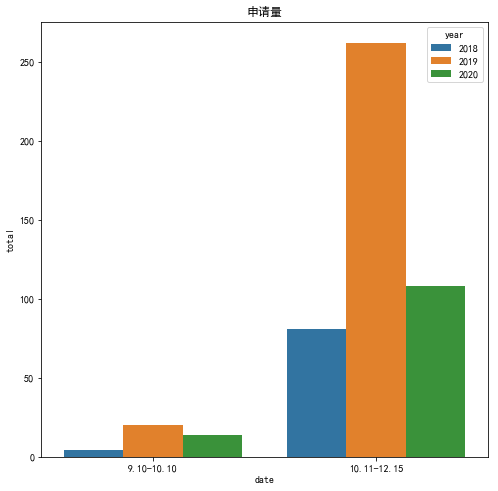

In [75]:
shenqingliang=pd.DataFrame()
shenqingliang["year"]=[2018]*2+[2019]*2+[2020]*2
shenqingliang["total"]=[uk182.shape[0],uk282.shape[0]]+[uk192.shape[0],uk292.shape[0]]+[uk102.shape[0],uk202.shape[0]]
shenqingliang["date"]=['9.10-10.10','10.11-12.15']*3

plt.rcParams['figure.figsize'] = [8,8]
plt.figure()
sns.barplot(x='date',y='total',hue='year',data=shenqingliang)
plt.title('申请量')
plt.show()

可能受申请周期影响，目前获取的offer数有限，英国有利的留学政策对留学结果的影响不是非常明显，与去年同期几乎呈齐平状态，后续会继续观测。

#### 6.2 香港事件对申请结果的影响

经研究发现香港地区的offer是从9月份开始报告的，申请季不穿插在7.8月份最集中的香港暴力行为间，故不对香港地区的申请时间段进行再次分类，直接对总数进行研究

In [117]:
hk181=df48.loc['2017-2-1':'2017-7-10']
hk191=df49.loc['2018-2-1':'2018-7-10']
hk101=df40.loc['2019-2-1':'2019-7-10']

hk281=df48.loc['2017-7-11':'2017-12-15']
hk291=df49.loc['2018-7-11':'2018-12-15']
hk201=df40.loc['2019-2-11':'2019-12-15']

alist=[[hk181.shape[0],hk281.shape[0]],[hk191.shape[0],hk291.shape[0]],[hk101.shape[0],hk201.shape[0]]]
sumhk=pd.DataFrame(data={'2018':alist[0],'2019':alist[1],'2020':alist[2]},index=['2.1-7.10','7.11-12.15'])

In [118]:
hk182=df481.loc['2017-2-1':'2017-7-10']
hk192=df491.loc['2018-2-1':'2018-7-10']
hk102=df401.loc['2019-2-1':'2019-7-10']

hk282=df481.loc['2017-7-11':'2017-12-15']
hk292=df491.loc['2018-7-11':'2018-12-15']
hk202=df401.loc['2019-2-11':'2019-12-15']

alist=[[hk182.shape[0],hk282.shape[0]],[hk192.shape[0],hk292.shape[0]],[hk102.shape[0],hk202.shape[0]]]
personhk=pd.DataFrame(data={'2018':alist[0],'2019':alist[1],'2020':alist[2]},index=['2.1-7.10','7.11-12.15'])

            2018  2019  2020
2.1-7.10       0     0     0
7.11-12.15   191   439    75


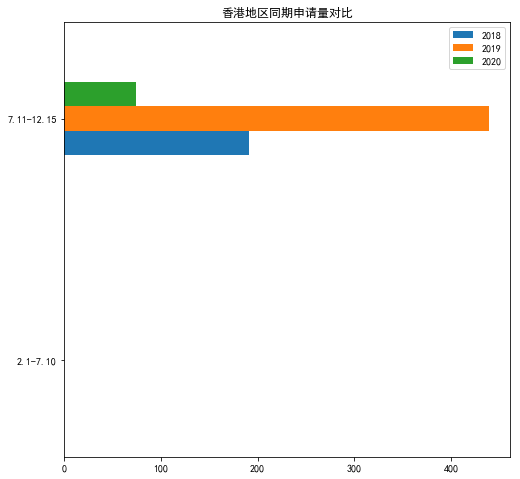

In [119]:
sumhk.plot.barh(width=0.3)
plt.title('香港地区同期申请量对比')
print(sumhk)

            2018  2019  2020
2.1-7.10       0     0     0
7.11-12.15   143   348    69


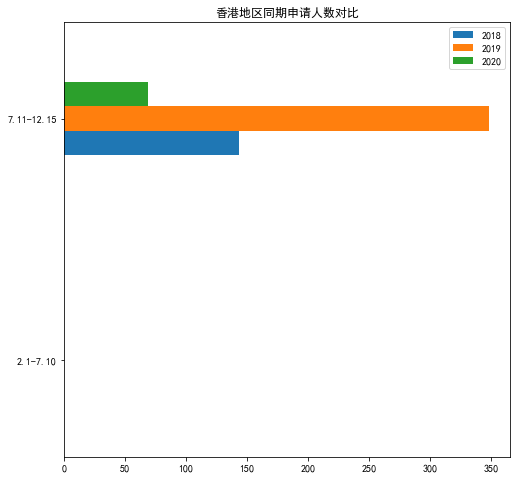

In [120]:
personhk.plot.barh(width=0.3)
plt.title('香港地区同期申请人数对比')
print(personhk)

受社会安全，形势等影响，香港地区申请率受到影响，同期下降较大。

### 七、具体学校数据分析

以英国为例，从其具体学校录取角度分析录取情况的变化

7.1首先在三年同期时间段中获取offer结果的申请人中 进行去重

In [121]:
df38o1=df38[~df38['申请结果'].isin(['被拒','Waitinglist'])]
df39o1=df39[~df39['申请结果'].isin(['被拒','Waitinglist'])]
df30o1=df30[~df30['申请结果'].isin(['被拒','Waitinglist'])]

uko1=df38o1.drop_duplicates(['id'],keep='first').reset_index(drop=True)
uko2=df39o1.drop_duplicates(['id'],keep='first').reset_index(drop=True)
uko3=df30o1.drop_duplicates(['id'],keep='first').reset_index(drop=True)

In [122]:
uko3.head()

,id,TOEFL,IELTS,GRE,GMAT,本科学校档次,本科专业,本科GPA及排名,研究生学校档次,研究生专业,研究生GPA及排名,其他说明,OFFER标签数,申请学校,申请学位,申请专业,申请结果,入学年度,入学时间,通知时间
0,2216819,NaN,"Overall: 6.5, R: 7 / L: 6. / S: 6 / W: 6",NaN,NaN,211,英语翻译,82.3大平均分,NaN,NaN,NaN,我所在的是本校下辖的二本外国语学院。没发过论文，没有牛推。与他人合译过一本小说集，现已电子出...,4,The University of Nottingham,MA,"Linguistics, Interpretation, and Translation",offer,2019,Fall,2019-12-12
1,2217632,NaN,"Overall: 7, R: 7 / L: 7.5 / S: 6.5 / W: 6.5",NaN,NaN,211,电子商务,3.5/4.0,NaN,NaN,NaN,NaN,3,University of Bath,MS,Business Analytics,offer,2019,Fall,2019-11-26
2,2240431,NaN,"Overall: 7, R: 7.5 / L: 7 / S: 7 / W: 6",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Kings College London,BSc,ECONOMICS AND MANAGEMENT,offer,2019,Fall,2019-12-05
3,2250143,"Overall: 101, R: 25 / L: 30 / S: 21 / W: 25",NaN,NaN,NaN,辅仁大学,英语系,88,NaN,NaN,NaN,NaN,0,University of Birmingham,MS,"Linguistics, Interpretation, and Translation",offer,2019,Fall,2019-10-01
4,2271464,NaN,"Overall: 6.5, R: 8 / L: 6.5 / S: 5.5 / W: 5.5",NaN,NaN,211 & 985,统计学,3.7/5,NaN,NaN,NaN,NaN,3,The University of Manchester,MS,数据科学,Wailting list,2019,Fall,2019-11-29


7.2.将个人信息中缺失值过多的列去掉

In [123]:
print(uko1['GRE'].isnull().sum(),uko2['GRE'].isnull().sum(),uko3['GRE'].isnull().sum())

81 265 108


In [124]:
print(uko1['TOEFL'].isnull().sum(),uko2['TOEFL'].isnull().sum(),uko3['TOEFL'].isnull().sum())

78 249 99


In [125]:
print(uko1['研究生学校档次'].isnull().sum(),uko2['研究生学校档次'].isnull().sum(),uko3['研究生学校档次'].isnull().sum())

77 256 106


In [126]:
print(uko1['研究生GPA及排名'].isnull().sum(),uko2['研究生GPA及排名'].isnull().sum(),uko3['研究生GPA及排名'].isnull().sum())

81 259 106


In [127]:
print(uko1['研究生专业'].isnull().sum(),uko2['研究生专业'].isnull().sum(),uko3['研究生专业'].isnull().sum())

78 258 106


In [128]:
print(uko1.shape[0],uko2.shape[0],uko3.shape[0])  

81 265 108


即GRE均为缺失值 

没有\没有提供TOEFL 以及没有读过研究生\提供研究生信息的同学均达到95%以上 以及OFFER标签列均可以去掉

In [129]:
del uko1['GRE']
del uko2['GRE']
del uko3['GRE']
del uko1['TOEFL']
del uko2['TOEFL']
del uko3['TOEFL']
del uko1['研究生学校档次']
del uko1['研究生专业']
del uko1['研究生GPA及排名']
del uko2['研究生学校档次']
del uko2['研究生专业']
del uko2['研究生GPA及排名']
del uko3['研究生学校档次']
del uko3['研究生专业']
del uko3['研究生GPA及排名'] 
del uko1['OFFER标签数']
del uko2['OFFER标签数']
del uko3['OFFER标签数']#drop函数无法正常使用

In [130]:
uko1.head()  #预览

,id,IELTS,GMAT,本科学校档次,本科专业,本科GPA及排名,其他说明,申请学校,申请学位,申请专业,申请结果,入学年度,入学时间,通知时间
0,2147059,"Overall: 7.5, R: 8.0 / L: 8.5 / S: 6.5 / W: 7.0",Q: 50 / V: 30,211,广播电视新闻学,均分89,4份实习 每年都有奖学金 实践活动较多,University of Edinburgh,MS,Marketing,offer,2018,Fall,2017-11-08
1,2147313,"Overall: 8, R: 9 / L: 8.5 / S: 7.5 / W: 7.5",NaN,浙大/复旦/南大/南开/武大/华中科大/上海交大/天大,英语,10%，1-100,选修了微积分，语言学课里学了一点编程（R），一份数据分析的实习。,University of Edinburgh,MS,Speech and Language Processing,AD无奖,2018,Fall,2017-12-04
2,2147482,"Overall: 6.5, R: 7.5 / L: 6.5 / S: 6 / W: 6",NaN,双非,工程管理,82-83,NaN,University of Leeds,MS,engineering project management,offer,2018,Fall,2017-10-31
3,2147490,"Overall: 7, R: / L: / S: / W:",NaN,NaN,NaN,NaN,NaN,University of Glasgow,MS,Educational studies,AD无奖,2018,Fall,2017-12-06
4,2147586,"Overall: 6.5, R: 7.0 / L: 7.0 / S: 5.5 / W: 6.0",NaN,四川农业大学,风景园林专业,87.56,NaN,Newcastle University,MA,Landscape Architecture 景观设计,offer,2018,Fall,2017-11-15


7.3.由于offer信息均为完全 故个人信息方面均能提供一定参考 故不进行删减处理

### 八、对商科领域申请成功者的个人情况进行分析

8.1.建立申请商科专业名录，以便对专业匹配进行筛选

In [131]:
list3=['Business Analytics','数据科学', '数学金融','金融数学',
'digital economy','ECONOMICS AND MANAGEMENT','Economics 经济','Finance & Economic Development',
'Finance and Investment','Financial Management','HK:Financial Technology',
'HK:MSc Finance','international marketing','management(marketing)','Marketing',
'Money Banking and Finance']


list2=['Management (Finance)','Finance and Accounting 财务与会计','Business analytics',
'Financial Management','international banking law and finance','Actuarial Science',
'MSC consumer analytics and marketing strategy','financial mathematics',
'business analytics','Mathematics','Financial Mathematics',
'Comparative Business Economics','Economics and Econometrics','金融数学',
'Investments and Securities 投资证券','Human Resources Management 人力资源管理',
'Banking and Finance 银行与金融','Investment Banking and Finance','Marketing',
'Computational Mathematical Finance','Business Analytics','Financial forecasting and investment',
'Advertising and Marketing','financial mathematics','Human Resources Management',
'Data Science (Applied Urban Analytics)','Computational Mathematical Finance',
'Global Economy','Economics','Econometrics and statistics','Human Resources Management 人力资源管理',
'商务分析','marketing communication','金融数学','Economics and Econometrics 经济学和计量经济学',
'商务金融与经济','Quantitative Finance','global supply chain management','Economics and Finance',
'Mathematics','Finance 金融','Money banking and finance','international marketing','金数',
'data analysis','FRM','Finance and Economics','Utipe (Economics)','Economics and Econometrics',
'Scientific computing and data analysis','Comparative business economics','Accounting',
'Finance 金融','quantitative social research','Accounting and Finance','Finance',
'Comparative Business Economics','International Business','Economics and Econometrics',
'operation and project management','financial risk management','市场营销','Investments and Securities 投资证券',
'Marketing','国际金融','Economics and Finance','Business Analytics','Banking and Finance',
'digital asset and media management','商法','quantitative social research','investment',
'Economics and Econometrics','financial economics','Banking and Finance 银行与金融',
'Economics and Business','Actuarial Science','Computational Mathematical Finance']


list1=['Marketing','finance (corporate finance)','International Business Management','Finance',
'financial management','Economics and Econometrics','finance (corporate finance)',
'Internet system and e-business','Marketing','Financial Risk Management MSc',
'Advertising & marketing','business analytics','Commerce Accounting','Management(Finnace)',
'International Relations','financial mathematic','Economics, Accounting and Finance']

list1.extend(list2)
list1.extend(list3)

In [132]:
uk1=uko1[uko1['申请专业'].isin(list1)]
uk2=uko2[uko2['申请专业'].isin(list1)]
uk3=uko3[uko3['申请专业'].isin(list1)]

8.2.对IELTS\GMAT\GPA等数据信息进行大致提取

先用groupby函数进行模式预览

In [134]:
for uk in [uk1,uk2,uk3]: 
    print(uk.groupby('IELTS').size())#IELTS模式统一 进行正则表达式提取即可
    print(uk.groupby('GMAT').size()) #GMAT大致统一 极端值清除即可
    print(uk.groupby('本科GPA及排名').size())  #模式混杂 包括分数形式和绩点形式

IELTS
Overall: 5.5, R: 5 / L: 6 / S: 5 / W: 6            1
Overall: 6.5, R: / L: / S: / W:                    1
Overall: 6.5, R: 6.5 / L: 6.5 / S: 5.5 / W: 6.5    1
Overall: 6.5, R: 7 / L: 6.5 / S: 6 / W: 6          1
Overall: 6.5, R: 7 / L: 6.5 / S: 6 / W: 6.5        1
Overall: 7, R: 7 / L: 7.5 / S: 7 / W: 6.5          2
Overall: 7, R: 7.5 / L: 8 / S: 6 / W: 6            1
Overall: 7, R: 8 / L: 8 / S: 6.5 / W: 6            1
Overall: 7, R: 8.5 / L: 6.5 / S: 6 / W: 6          1
Overall: 7.5, R: 8 / L: 8 / S: 6.5 / W: 6.5        1
Overall: 7.5, R: 8.0 / L: 8.5 / S: 6.5 / W: 7.0    1
Overall: 7.5, R: 9 / L: 8.5 / S: 6 / W: 6          1
R: 8.5 / L: 8.5 / S: 6 / W: 6.5                    1
dtype: int64
GMAT
Overall: 650, Q: 29 / V: 50    1
Q: 50 / V: 30                  1
dtype: int64
本科GPA及排名
3.38          1
3.69          1
84            2
85            2
87.7          1
3.64/4.0      1
3.66/4        1
3.78/4        1
87.6 3.7/5    1
90.13，专业前5    1
均分83.4        1
均分89          1
dtype: 

运用正则表达式进行提取

In [135]:
for uk in [uk1,uk2,uk3]:
    uk['IELTS']=uk['IELTS'].str.extract(r'(\d+\.?\d*)')
    uk['GMAT']=uk['GMAT'].str.extract(r'(\d+)')
    uk['本科GPA及排名']=uk['本科GPA及排名'].str.extract("(\d+\.?\d*)")

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A

IELTS匹配很好，GMAT需要去除极端值，GPA则需要后处理(包含绩点表达形式)

In [136]:
uk1.head()

,id,IELTS,GMAT,本科学校档次,本科专业,本科GPA及排名,其他说明,申请学校,申请学位,申请专业,申请结果,入学年度,入学时间,通知时间
0,2147059,7.5,50,211,广播电视新闻学,89,4份实习 每年都有奖学金 实践活动较多,University of Edinburgh,MS,Marketing,offer,2018,Fall,2017-11-08
11,2148576,7,NaN,211,NaN,NaN,NaN,Kings College London,MS,finance (corporate finance),offer,2018,Fall,2017-12-12
13,2148817,7.5,NaN,双非,NaN,3.66,在香港工作五年。。。纯属停下脚步思考人生的选择。。。,Durham University,MS,International Business Management,offer,2018,Fall,2017-11-07
14,2148865,NaN,NaN,211,金融,NaN,NaN,Kings College London,MS,Finance,offer,2018,Fall,2017-12-01
16,2149005,7,NaN,双非,人力资源管理,NaN,NaN,University of Birmingham,MS,financial management,offer,2018,Fall,2017-12-14


8.3.提取主干信息

In [137]:
uk1=uk1[['IELTS','GMAT','本科GPA及排名','本科学校档次','申请学校']].reset_index(drop=True)
uk2=uk2[['IELTS','GMAT','本科GPA及排名','本科学校档次','申请学校']].reset_index(drop=True)
uk3=uk3[['IELTS','GMAT','本科GPA及排名','本科学校档次','申请学校']].reset_index(drop=True)
uk2.head()

,IELTS,GMAT,本科GPA及排名,本科学校档次,申请学校
0,7,660,NaN,上海大学,Durham University
1,6.5,NaN,NaN,985,利兹大学
2,6,NaN,83.84,台湾本科,The University of Nottingham 诺丁汉大学
3,6,NaN,3.47,双非,University of Birmingham 伯明翰大学
4,NaN,NaN,86,双非,University of Edinburgh


8.4.数据清洗 由于数据数目较少，故将极端值处理为缺失值

In [138]:
uk2.groupby('GMAT').groups  #92为极端值应去除
uk2.groupby('本科GPA及排名').groups
uk2.groupby('IELTS').groups

{'6': Int64Index([2, 3, 8, 18, 24, 33, 52, 53], dtype='int64'),
 '6.5': Int64Index([1, 17, 28, 34, 40, 45, 51, 54, 57, 60, 65, 66, 67, 68, 75, 77, 82], dtype='int64'),
 '7': Int64Index([0, 6, 10, 13, 20, 22, 23, 26, 32, 37, 39, 44, 50, 59, 62, 63, 71,
             73, 78, 79],
            dtype='int64'),
 '7.5': Int64Index([15, 16, 25, 27, 29, 38, 43, 56, 58, 64, 72, 74], dtype='int64'),
 '8': Int64Index([36], dtype='int64'),
 '8.0': Int64Index([35], dtype='int64')}

In [139]:
uk1.groupby('GMAT').groups #50为极端值应去除
uk1.groupby('本科GPA及排名').groups
uk1.groupby('IELTS').groups

{'5.5': Int64Index([8], dtype='int64'),
 '6.5': Int64Index([5, 12, 13, 16], dtype='int64'),
 '7': Int64Index([1, 4, 7, 11, 15], dtype='int64'),
 '7.5': Int64Index([0, 2, 6], dtype='int64'),
 '8.5': Int64Index([14], dtype='int64')}

In [140]:
uk3.groupby('GMAT').groups  #89异常值
uk3.groupby('本科GPA及排名').groups
uk3.groupby('IELTS').groups

{'6': Int64Index([6], dtype='int64'),
 '6.5': Int64Index([2, 3, 4, 7, 12, 16], dtype='int64'),
 '7': Int64Index([0, 1, 5, 8, 9, 10, 13, 14, 15, 20], dtype='int64'),
 '7.5': Int64Index([17], dtype='int64')}

In [141]:
uk1.loc[0,'GMAT']=np.nan
uk2.loc[29,'GMAT']=np.nan
uk3.loc[20,'GMAT']=np.nan

对绩点形式改变为百分数形式，一般满绩为4，粗略计算：绩点/4*100

In [142]:
index3=uk3[((uk3['本科GPA及排名']).astype(float)<5) & ((uk3['本科GPA及排名']).astype(float)>1.5)]['本科GPA及排名'].index
gpa3=((uk3[((uk3['本科GPA及排名']).astype(float)<5) & ((uk3['本科GPA及排名']).astype(float)>1.5)]['本科GPA及排名']).astype(float)*25).copy()
for i in index3:
    uk3.loc[i,'本科GPA及排名']=gpa3[i]
uk3.groupby('本科GPA及排名').size()
#数据类型转换后才能计算 用别的方法一直报错 最后只能用循环解决

本科GPA及排名
83.75    1
85.0     1
87.5     2
88.5     1
90.0     1
92.5     1
93.5     1
95.0     1
71       1
79.08    1
86       1
86.88    1
88       1
dtype: int64

In [143]:
index2=uk2[((uk2['本科GPA及排名']).astype(float)<5) & ((uk2['本科GPA及排名']).astype(float)>1.5)]['本科GPA及排名'].index
gpa2=((uk2[((uk2['本科GPA及排名']).astype(float)<5) & ((uk2['本科GPA及排名']).astype(float)>1.5)]['本科GPA及排名']).astype(float)*25).copy()
for i in index2:
    uk2.loc[i,'本科GPA及排名']=gpa2[i]

index1=uk1[((uk1['本科GPA及排名']).astype(float)<5) & ((uk1['本科GPA及排名']).astype(float)>1.5)]['本科GPA及排名'].index
gpa1=((uk1[((uk1['本科GPA及排名']).astype(float)<5) & ((uk1['本科GPA及排名']).astype(float)>1.5)]['本科GPA及排名']).astype(float)*25).copy()
for i in index1:
    uk1.loc[i,'本科GPA及排名']=gpa1[i]

8.5.数据清洗 改变数据类型

标化成绩保守估计 缺失值用入学平均要求来填充

IELTS 6.5 GMAT 650 GPA 85

In [144]:
uk1['IELTS']=uk1['IELTS'].fillna(6.5)
uk2['IELTS']=uk2['IELTS'].fillna(6.5)
uk3['IELTS']=uk3['IELTS'].fillna(6.5)
uk1['GMAT']=uk1['GMAT'].fillna(650)
uk2['GMAT']=uk2['GMAT'].fillna(650)
uk3['GMAT']=uk3['GMAT'].fillna(650)
uk1['本科GPA及排名']=uk1['本科GPA及排名'].fillna(86.73)
uk2['本科GPA及排名']=uk2['本科GPA及排名'].fillna(86.73)
uk3['本科GPA及排名']=uk3['本科GPA及排名'].fillna(86.73)

In [145]:
list1=[uk1['IELTS'].astype(float).mean(),uk2['IELTS'].astype(float).mean(),uk3['IELTS'].astype(float).mean()]
list2=[uk1['GMAT'].astype(float).mean(),uk2['GMAT'].astype(float).mean(),uk3['GMAT'].astype(float).mean()]
list3=[uk1['本科GPA及排名'].astype(float).mean(),uk3['本科GPA及排名'].astype(float).mean(),uk2['本科GPA及排名'].astype(float).mean()]

In [146]:
sum1=pd.DataFrame({'2018':[list1[0],list2[0],list3[0]],'2019':[list1[1],list2[1],list3[1]],'2020':[list1[2],list2[2],list3[2]]},index=['IELTS','GMAT','本科GPA及排名'])

In [147]:
sum1

,2018,2019,2020
IELTS,6.861111,6.753012,6.761905
GMAT,650.000000,652.530120,650.952381
本科GPA及排名,87.842222,86.729524,88.012048


如上所示，与去年同期相较，录取GMAT成绩无明显影响变化，成功申请者的IELTS和GPA都有明显增幅，表明新政落地，同期竞争压力变大。

#### 录取偏好学校档次大致观察

In [149]:
uk1.groupby(['本科学校档次']).size()
uk2.groupby(['本科学校档次']).size()
uk1.groupby(['本科学校档次']).size()

本科学校档次
211          6
211 & 985    1
上海财经大学       1
双非           7
大连理工大学       1
dtype: int64

In [150]:
uk1.groupby(['本科学校档次','本科GPA及排名']).groups

{(211, '89'): Int64Index([0], dtype='int64'),
 (211, 86.73): Int64Index([1, 3, 8, 13], dtype='int64'),
 ('双非', 91.5): Int64Index([2], dtype='int64'),
 ('双非', 86.73): Int64Index([4, 6, 11], dtype='int64'),
 ('双非', 91.0): Int64Index([5], dtype='int64'),
 ('大连理工大学', 86.73): Int64Index([7], dtype='int64'),
 (nan, 86.73): Int64Index([9, 17], dtype='int64'),
 ('211 & 985', '83.4'): Int64Index([10], dtype='int64'),
 ('双非', '90.13'): Int64Index([12], dtype='int64'),
 (211, 94.5): Int64Index([14], dtype='int64'),
 ('上海财经大学', 86.73): Int64Index([15], dtype='int64'),
 ('双非', '87.6'): Int64Index([16], dtype='int64')}

In [151]:
dic1={'211':7,'985或国外相同级别高校':2,'双非':7}
dic2={'211':29,'985或国外相同级别高校':24,'双非':21}
dic3={'211':6,'985或国外相同级别高校':10,'双非':4}

In [152]:
school=pd.DataFrame({'2018':dic1,'2019':dic2,'2020':dic3},index=['211','985或国外相同级别高校','双非'])
school

,2018,2019,2020
211,7,29,6
985或国外相同级别高校,2,24,10
双非,7,21,4


In [154]:
sum2=pd.DataFrame({'2018':[16,16,16],'2019':[74,74,74],'2020':[20,20,20]},index=['211','985或国外相同级别高校','双非'])
div3=school.div(sum2)
div3

,2018,2019,2020
211,0.4375,0.391892,0.3
985或国外相同级别高校,0.1250,0.324324,0.5
双非,0.4375,0.283784,0.2


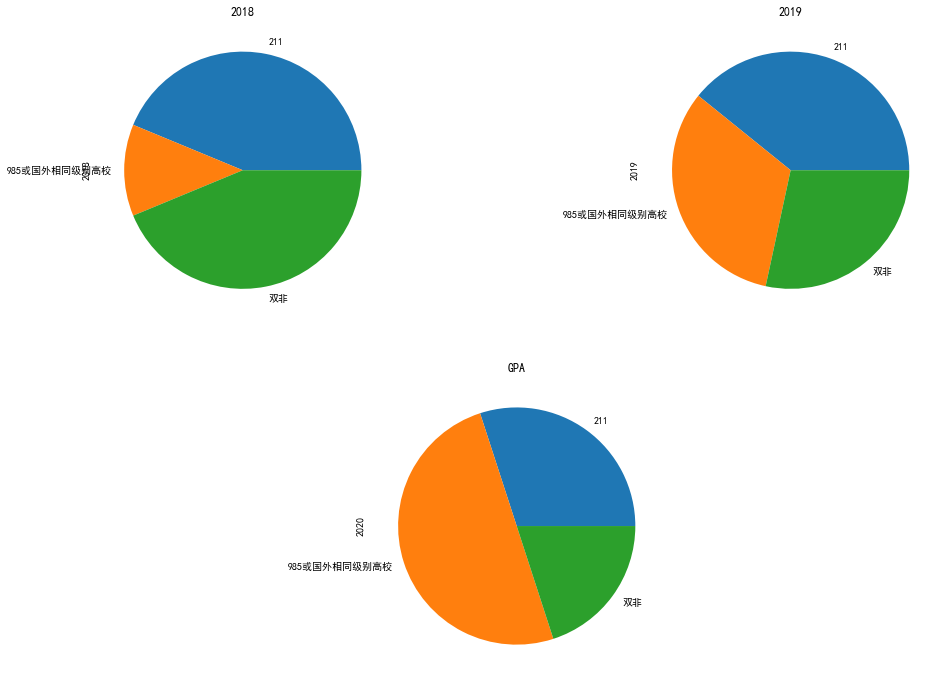

In [155]:
plt.figure(figsize=(18,12))
ax1=plt.subplot(221)
ax1.set_title('2018')
div3['2018'].plot.pie()

ax2=plt.subplot(222)
ax2.set_title('2019')
div3['2019'].plot.pie()

ax3=plt.subplot(212)
ax3.set_title('GPA')
div3['2020'].plot.pie()

plt.show()

### 研究结论

1.从申请总数据：1)五个地区 2)三年同期 进行总体分析,经过统计显著性假设检验，从申请率和失败率两个角度进行分析，受样本容量限制，申请率和失败率的变动不是特别明显。

2.以澳洲和新加坡作为基准参考，发现英国、香港同期的申请率呈现较大的幅度变动，与英国留学政策的转变和香港的社会安全有关。

3.从标化成绩IELTS\GRE\GMAT\GPA等定量分析，在英国留学政策放宽的情况下，留学申请竞争压力大大增加，对标化成绩的录取门槛逐渐提高。

4.从商科相近专业的大类录取信息分析，成功申请者中的院校层次有较大改变，逐渐偏向985及国外相等层级的高校，211及双非学校逐渐处于申请劣势。

### 研究不足之处

1.论坛本身的申请者更偏向于投稿自己的成功申请结果，因此爬虫得到的被拒结果相对较少，可能对研究结果造成了总体影响。

2.研究后发现申请者提供的是通知时间而非申请时间，故具体研究留学政策对时间段的影响，应当研究申请时间而非通知时间，这是研究存在的另一个系统缺陷，可能会造成较大误差。

3.受申请和录取周期的影响，同期时间段美国的录取数较少，故没有纳入具体研究的范围内，造成了一定的研究局限。

4.在研究过程中，主要提取了标化成绩的内容，由于个人说明中科研论文\实习等表达形式极度复杂，没有找到合适的提取方法，后续可能会继续优化，尝试提取，我本身更想要做一个预测模型，但是没有能够成功实现。

5.在本次信息提取中，采取的是dataframe中id中对应连接两部分的爬取信息，虽然最终成功实现了但是有些繁琐，我想要尝试用数据库等的方法进行键值连接，或许会更卓有成效。